# Informações preliminares

O data set usado neste estudo pode ser encontrado no link abaixo

https://drive.google.com/file/d/1VGBDU7tyPlrIB4EBWzAWeI-4ePzMEO6r/view?usp=sharing

# Instalaçao de biblioteca

In [1]:
!pip install xgboost

# Importando bibliotecas e módulos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from joblib import dump, load

# Importação e visualização dos dados

In [3]:
house = pd.read_csv('/content/Housing.csv')
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Descrição geral dos dados

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Descrição estatística dos dados

In [5]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Detecção de dados nulos

In [6]:
house.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [7]:
print(f'Vemos que o dataset não possui dados nulos, como esperado,\
 em concordância com o resultado obtido pelo comando house.info().')

Vemos que o dataset não possui dados nulos, como esperado, em concordância com o resultado obtido pelo comando house.info().


# Detecção de duplicatas

In [8]:
print(f'Vemos que o dataset possui {len(house[house.duplicated(keep=False)])} duplicatas.')

Vemos que o dataset possui 0 duplicatas.


# Tratamento de dados

## Detecção de variáveis numéricas e categóricas

In [9]:
categ_var = house.select_dtypes(include='object').columns
num_var = house.select_dtypes(include='int64').columns

## Aplicando LabelEncoder nas variáveis categóricas

In [10]:
for x in categ_var:
  LE = LabelEncoder()
  house[x] = LE.fit_transform(house[x])

display(house)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


# Aplicando MinMaxScaler

Como as colunas de preço e área possuem valores muito grandes, em discrepÂncia co as demais colunas, vamos reescalar as colunas do dataset

In [11]:
MMS = MinMaxScaler()
MMS.fit(house[['price','area']])
df = pd.DataFrame(MMS.transform(house[['price','area']]),columns=['price','area'])
for x in ['price','area']:
  house[x] = df[x]
display(house)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,0
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,0
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,1
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,0
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,2,1,1,1,0,1,0,0,2,0,2
541,0.001485,0.051546,3,1,1,0,0,0,0,0,0,0,1
542,0.000000,0.135395,2,1,1,1,0,0,0,0,0,0,2
543,0.000000,0.086598,3,1,1,0,0,0,0,0,0,0,0


# Análise de dados

Axes(0.125,0.11;0.62x0.77)


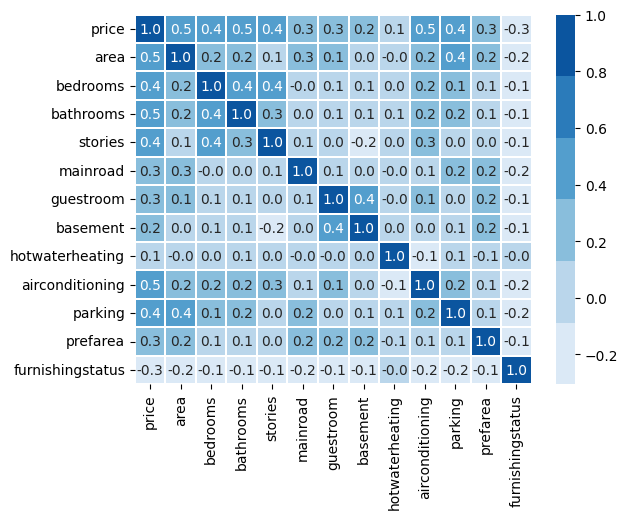

In [12]:
print(sns.heatmap(house.corr(),cmap=sns.color_palette("Blues"),fmt=".1f", linewidths=.25, annot=True))

<Axes: ylabel='price'>

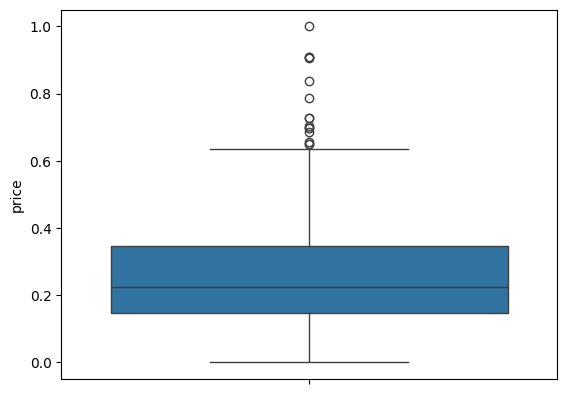

In [13]:
sns.boxplot(house['price'])

# Separação dos dados de treino e de teste

In [14]:
X = house[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]
Y = house[['price']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.3)

# Regressão multilinear

## Definição e treinamento do modelo

In [15]:
LR = LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

## Previsões

In [16]:
Y_pred = LR.predict(X_test)
Y_pred_train = LR.predict(X_train)

## Métricas

In [17]:
print('Métricas para os dados de treino')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_train,Y_pred_train)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_train,Y_pred_train)}.')
print(100*'-')
print('Métricas para os dados de teste')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_test,Y_pred)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_test,Y_pred)}.')

Métricas para os dados de treino
Desvio médio absoluto: 0.0622892415476123.
Desvio quadrático médio: 0.007234895684178883.
----------------------------------------------------------------------------------------------------
Métricas para os dados de teste
Desvio médio absoluto: 0.08013364054681005.
Desvio quadrático médio: 0.011506888989547045.


# Regressão polinomial

## Definição e treinamento do modelo

In [18]:
PF = PolynomialFeatures(degree=3,include_bias=False)
X_train5 = PF.fit_transform(X_train)
X_test5 = PF.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train5,Y_train)

LinearRegression()

## Previsões

In [19]:
Y_pred = model.predict(X_test5)
Y_pred_train = model.predict(X_train5)

## Métricas

In [20]:
print('Métricas para os dados de treino')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_train,Y_pred_train)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_train,Y_pred_train)}.')
print(100*'-')
print('Métricas para os dados de teste')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_test,Y_pred)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_test,Y_pred)}.')

Métricas para os dados de treino
Desvio médio absoluto: 0.01785934086447405.
Desvio quadrático médio: 0.0007171587984378772.
----------------------------------------------------------------------------------------------------
Métricas para os dados de teste
Desvio médio absoluto: 0.5019936666556127.
Desvio quadrático médio: 0.7962570366345837.


# Regressão por árvore de decisão

## Definição e treinamento do modelo

In [21]:
tree = DecisionTreeRegressor()
tree.fit(X_train,Y_train)

DecisionTreeRegressor()

## Previsões

In [22]:
Y_pred_train = tree.predict(X_train)
Y_pred = tree.predict(X_test)

## Métricas

In [23]:
print('Métricas para os dados de treino')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_train,Y_pred_train)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_train,Y_pred_train)}.')
print(100*'-')
print('Métricas para os dados de teste')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_test,Y_pred)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_test,Y_pred)}.')

Métricas para os dados de treino
Desvio médio absoluto: 0.0004931201781595481.
Desvio quadrático médio: 2.0280109614397368e-05.
----------------------------------------------------------------------------------------------------
Métricas para os dados de teste
Desvio médio absoluto: 0.11027335550628233.
Desvio quadrático médio: 0.026959371120741777.


# Regressão por floresta aleatória

## Definição e treinamento do modelo

In [24]:
RF = RandomForestRegressor(n_estimators=100)
RF.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

## Previsões

In [25]:
Y_pred_train = RF.predict(X_train)
Y_pred = RF.predict(X_test)

## Métricas

In [26]:
print('Métricas para os dados de treino')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_train,Y_pred_train)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_train,Y_pred_train)}.')
print(100*'-')
print('Métricas para os dados de teste')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_test,Y_pred)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_test,Y_pred)}.')

Métricas para os dados de treino
Desvio médio absoluto: 0.02385362939859788.
Desvio quadrático médio: 0.0011238287979642866.
----------------------------------------------------------------------------------------------------
Métricas para os dados de teste
Desvio médio absoluto: 0.08239444949494949.
Desvio quadrático médio: 0.01356436307903824.


# Regressão adaboost

## Definição e treinamento do modelo

In [27]:
ada = AdaBoostRegressor(n_estimators=100)
ada.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(n_estimators=100)

## Previsões

In [28]:
Y_pred_train = ada.predict(X_train)
Y_pred = ada.predict(X_test)

## Métricas

In [29]:
print('Métricas para os dados de treino')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_train,Y_pred_train)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_train,Y_pred_train)}.')
print(100*'-')
print('Métricas para os dados de teste')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_test,Y_pred)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_test,Y_pred)}.')

Métricas para os dados de treino
Desvio médio absoluto: 0.07037267590432197.
Desvio quadrático médio: 0.0073128862331758365.
----------------------------------------------------------------------------------------------------
Métricas para os dados de teste
Desvio médio absoluto: 0.09519728455356241.
Desvio quadrático médio: 0.015471443521699423.


# Regressão gradiente boosting

## Definição e treinamento do modelo

In [30]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor()

## Previsões

In [31]:
Y_pred_train = GBR.predict(X_train)
Y_pred = GBR.predict(X_test)

## Métricas

In [32]:
print('Métricas para os dados de treino')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_train,Y_pred_train)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_train,Y_pred_train)}.')
print(100*'-')
print('Métricas para os dados de teste')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_test,Y_pred)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_test,Y_pred)}.')

Métricas para os dados de treino
Desvio médio absoluto: 0.03999957687989589.
Desvio quadrático médio: 0.0028686112125737443.
----------------------------------------------------------------------------------------------------
Métricas para os dados de teste
Desvio médio absoluto: 0.08040701999310942.
Desvio quadrático médio: 0.011857313545147505.


# Regressão por máquina de vetor de suporte

## Definição e treinamento do modelo

In [33]:
svr = SVR()
svr.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Previsões

In [34]:
Y_pred_train = svr.predict(X_train)
Y_pred = svr.predict(X_test)

## Métricas

In [35]:
print('Métricas para os dados de treino')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_train,Y_pred_train)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_train,Y_pred_train)}.')
print(100*'-')
print('Métricas para os dados de teste')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_test,Y_pred)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_test,Y_pred)}.')

Métricas para os dados de treino
Desvio médio absoluto: 0.05621153589567292.
Desvio quadrático médio: 0.005405158804815947.
----------------------------------------------------------------------------------------------------
Métricas para os dados de teste
Desvio médio absoluto: 0.07890666170975333.
Desvio quadrático médio: 0.010994977770247763.


# Regressão xgboost

## Definição e treinamento do modelo

In [36]:
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Previsões

In [37]:
Y_pred_train = xgb.predict(X_train)
Y_pred = xgb.predict(X_test)

## Métricas

In [38]:
print('Métricas para os dados de treino')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_train,Y_pred_train)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_train,Y_pred_train)}.')
print(100*'-')
print('Métricas para os dados de teste')
print(f'Desvio médio absoluto: {mean_absolute_error(Y_test,Y_pred)}.')
print(f'Desvio quadrático médio: {mean_squared_error(Y_test,Y_pred)}.')

Métricas para os dados de treino
Desvio médio absoluto: 0.0035540848039090633.
Desvio quadrático médio: 4.0789131162455305e-05.
----------------------------------------------------------------------------------------------------
Métricas para os dados de teste
Desvio médio absoluto: 0.09022197127342224.
Desvio quadrático médio: 0.016368035227060318.


# Salvando o modelo de máquina de vetor de suporte para fazer deploy no futuro

In [39]:
dump(svr,'support_vector_regressor.joblib')

['support_vector_regressor.joblib']

# Carregando o modelo e comparando previsões com dados de teste

In [40]:
final = load('/content/support_vector_regressor.joblib')
df = pd.DataFrame(final.predict(X_test))
df.columns = ['valor_previsto']
df2 = Y_test.reset_index(drop=True)
df['valor_real'] = df2['price']
display(df)


,valor_previsto,valor_real
0,0.258016,0.200000
1,0.475835,0.424242
2,0.144326,0.169697
3,0.232999,0.406061
4,0.166116,0.090909
...,...,...
159,0.208141,0.151515
160,0.216501,0.139394
161,0.451645,0.278788
162,0.278375,0.121212


<ipython-input-50-5bf17182057b>:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Valor real','Valor previsto')


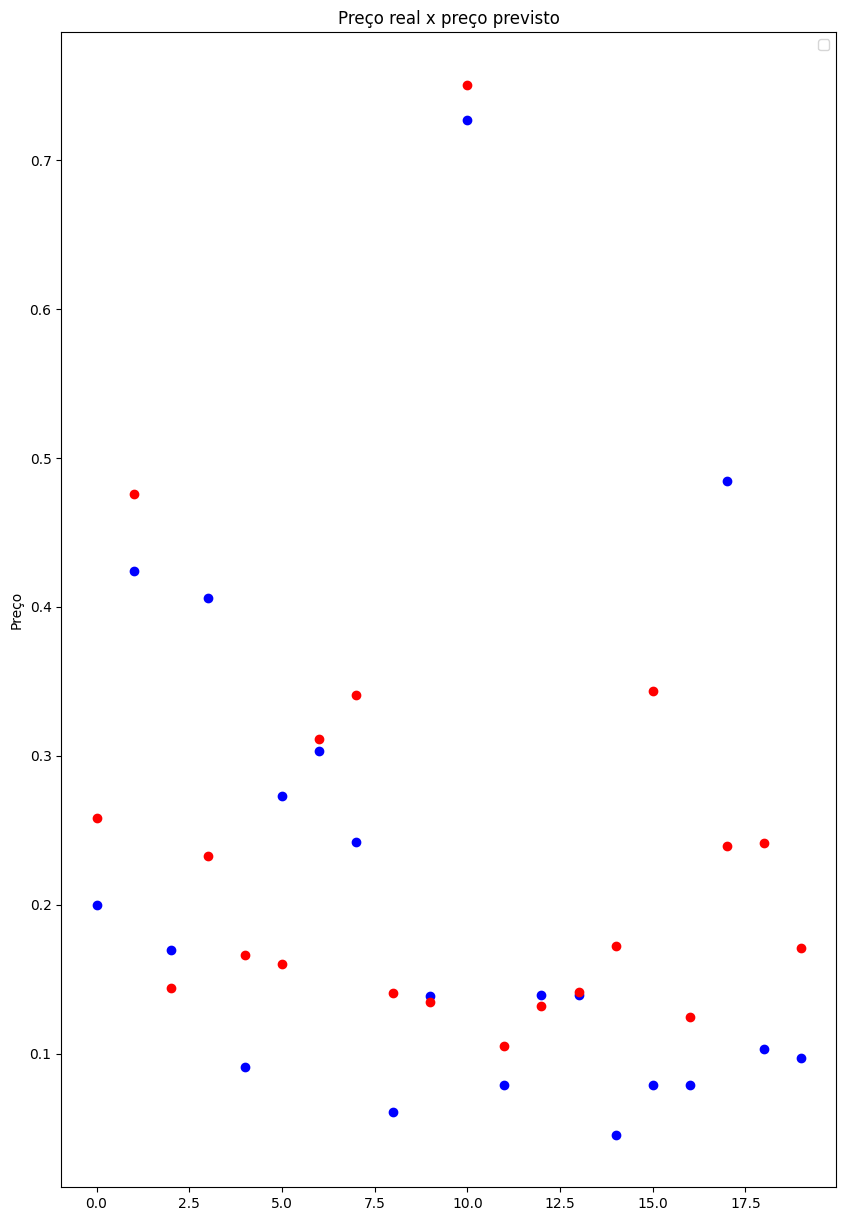

In [50]:
lista = range(0,len(df))
plt.figure(figsize=(10,15))
plt.scatter(lista[0:20],df['valor_real'][0:20],color='blue')
plt.scatter(lista[0:20],df['valor_previsto'][0:20],color='red')
plt.title('Preço real x preço previsto')
plt.ylabel('Preço')
plt.legend('Valor real','Valor previsto')
plt.show()

# Métrica (mesmo cálculo feito anteriormente)

In [42]:
print('Métricas')
print(f'Desvio médio absoluto: {mean_absolute_error(final.predict(X_test),Y_test)}.')
print(f'Desvio quadrático médio: {mean_squared_error(final.predict(X_test),Y_test)}.')

Métricas
Desvio médio absoluto: 0.07890666170975333.
Desvio quadrático médio: 0.010994977770247763.
